In [19]:
# coding: utf-8
%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd
# read the csv file
df = pd.read_csv("cleaned_foodfacts.csv", sep='\t',low_memory=False)


In [20]:
# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

(320685, 28)
Index(['code', 'product_name', 'brands', 'brands_tags', 'categories',
       'categories_fr', 'origins', 'manufacturing_places', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'additives_n',
       'additives', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')


In [21]:
##Observe the numerical data in the dataframe

In [22]:
df.describe().style


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939,248939,248939,261113,243887,229551,243569,244952,200881,259918,255352,255429,221210,221210
mean,1.93602,0.0196594,0.0552465,1141.91,12.7253,5.12592,32.0553,15.9854,2.83247,7.07941,1.5885,0.647145,9.16554,9.05805
std,2.50202,0.140524,0.269207,6447.15,17.5037,7.91368,29.1407,21.1654,4.58827,8.15655,6.24253,2.65634,9.0559,9.18359
min,0,0,0,0,0,0,0,0,0,0,0,0,-15,-15
25%,0,0,0,377,0,0,6,1.3,0,0.7,0.0635,0.025,1,1
50%,1,0,0,1100,5,1.79,20.6,5.71,1.5,4.76,0.58,0.229,10,9
75%,3,0,0,1674,20,7.14,58.33,24,3.6,10,1.3716,0.541,16,16
max,31,2,6,3.25137e+06,100,100,100,100,100,100,100,100,40,40


In [ ]:
##Remove rows where palm oil presence is NaN or 0

In [97]:
df_palmoil=df[df.categories_fr.notna() & df.ingredients_from_palm_oil_n.notna() & df.ingredients_from_palm_oil_n!=0]
print(df_palmoil.shape)

(3887, 28)


In [98]:
##Add a simpler categories column: gen_categories, it only takes the main category tag for each product

In [108]:
df_palmoil['gen_categories']=df_palmoil['categories_fr'].str.split(',').str[0]
for x in df_palmoil['gen_categories'].unique():
    if df_palmoil['gen_categories'].value_counts()[x]<60:
        df_palmoil['gen_categories'].replace(to_replace=x,value='Autres',inplace=True)
        

In [109]:
print(df_palmoil['gen_categories'].value_counts())

Snacks sucrés                              1889
Aliments et boissons à base de végétaux     704
Autres                                      322
Snacks salés                                152
Plats préparés                              111
Produits à tartiner                         108
Desserts                                     87
Surgelés                                     83
Epicerie                                     80
Frais                                        80
Gaufres                                      79
Pâtes à tarte                                67
Produits déshydratés                         64
Aliments pour bébé                           61
Name: gen_categories, dtype: int64


Text(0,0.5,'')

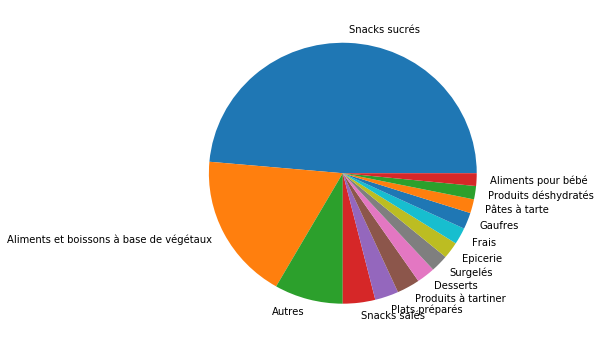

In [110]:

df_palmoil['gen_categories'].value_counts().plot.pie(figsize=(6,6))
plt.ylabel('')